In [8]:
# For another day...
# Maybe try decision tree regression...https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# Note to self: good ol' stackoverflow link: https://stackoverflow.com/questions/51972637/nonlinear-regression-with-python-whats-a-simple-method-to-fit-this-data-bette

# 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn 

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# TODO: make data preparation a function!! so I can try different datasets

# 2. Extract and show the data 
#### Remember: Group A includes the black group and Group B includes the white group

In [3]:
data_path_A = "/home/mackenzie/git_repositories/delayedimpact/data/simulated_data/simData_2dec_groupA_black.csv"
data_path_B = "/home/mackenzie/git_repositories/delayedimpact/data/simulated_data/simData_2dec_groupB_white.csv"

data_A = pd.read_csv(data_path_A)
data_B = pd.read_csv(data_path_B)

In [4]:
print("Our simulation data for the Black or A Group:")
print(data_A)
print("Our simulation data for the White or B Group:")
print(data_B)

Our simulation data for the Black or A Group:
      score  repay_probability
0    311.90               0.77
1    311.90               0.77
2    311.90               0.77
3    311.90               0.77
4    323.81               1.20
..      ...                ...
115  772.15              95.23
116  778.48              95.03
117  797.47              96.27
118  806.14              96.90
119  814.91              97.33

[120 rows x 2 columns]
Our simulation data for the White or B Group:
      score  repay_probability
0    300.00               1.46
1    311.90               2.05
2    311.90               2.05
3    323.81               2.64
4    323.81               2.64
..      ...                ...
875  836.84              99.02
876  841.23              99.05
877  841.23              99.05
878  841.23              99.05
879  845.61              99.07

[880 rows x 2 columns]


# 3. Transform data from pandas df --> numpy array

In [5]:
scores_A = data_A['score'].to_numpy()
probs_A = data_A['repay_probability'].to_numpy()

scores_B = data_B['score'].to_numpy()
probs_B = data_B['repay_probability'].to_numpy()

# 4. Prepare data for model training/testing

In [6]:
def prepare_data(scores, probabilities):
    x = scores.reshape(-1,1)
    y = probabilities
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test 

In [7]:
X_train_A, X_test_A, y_train_A, y_test_A = prepare_data(scores_A, probs_A)
X_train_B, X_test_B, y_train_B, y_test_B = prepare_data(scores_B, probs_B)

# 5. Non-Linear Regression Methods

## 5.1 Helpful functions for below

In [9]:
def run_svr(X_train, y_train, X_test, y_test, kernel, C, epsilon):
    regr = make_pipeline(StandardScaler(), SVR(kernel=kernel, C=C, epsilon=epsilon))
    regr.fit(X_train, y_train)
    pred_regr = regr.predict(X_test).reshape(-1,1)
    coeff_deter = regr.score(pred_regr, y_test)
    print(coeff_deter)
    return regr

def visualize_svr(regr, X_test, y_test, title):
    print('Note: magenta is true, green is predicted')
    plt.scatter(X_test, y_test, color = 'magenta')
    plt.scatter(X_test, regr.predict(X_test), color = 'green')
    plt.title(title)
    plt.xlabel('Credit Score')
    plt.ylabel('Probability')
    plt.show()

## 5.1 Support Vector Regression from sklearn

Support Vector Regression from sklearn with different kernels <br /> 
kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’ <br /> 
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html <br /> 
Reference: https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d <br /> 
From second ref above: most important SVR parameter is Kernel type  <br /> 
It can be linear, polynomial or gaussian SVR...non-linear condition...can select polynomial or gaussian

### 5.1.1 SVR RBF Kernel

Run SVR with RBF Kernel for Group A:
-0.02559233985925613
Note: magenta is true, green is predicted


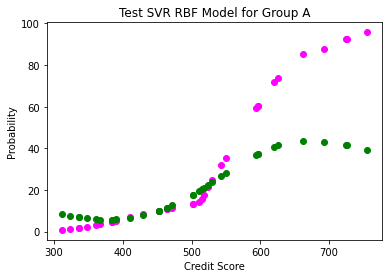

Run SVR with RBF Kernel for Group B:
-0.4305603445006858
Note: magenta is true, green is predicted


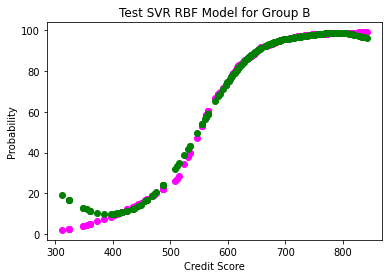

In [10]:
print("Run SVR with RBF Kernel for Group A:")
svr_rbf_A = run_svr(X_train_A, y_train_A, X_test_A, y_test_A, kernel='rbf', C=1.0, epsilon=0.3)
visualize_svr(svr_rbf_A, X_test_A, y_test_A, 'Test SVR RBF Model for Group A')

print("Run SVR with RBF Kernel for Group B:")
svr_rbf_B = run_svr(X_train_B, y_train_B, X_test_B, y_test_B, kernel='rbf', C=1.0, epsilon=0.3)
visualize_svr(svr_rbf_B, X_test_B, y_test_B, 'Test SVR RBF Model for Group B')

In [11]:
# TODO: try other data
# TODO: try other epsilon and C values?
# try changing epsilon and C/the regularization parameter (how much you want to avoid misclassifying each training example)

In [12]:
# RBF Results achieved before on first data

# Group B
#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))  #-->coeff: -0.36296498276294864
#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.3))  #-->coeff: -0.3652976042122389
#regr = make_pipeline(StandardScaler(), SVR(C=0.5, epsilon=0.3))  #-->coeff: -0.23835375001776704
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(C=0.1, epsilon=0.3))  #-->coeff: -0.042382992971224054

# Group A
#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) #-->coeff_deter: -0.012706644468506667
#regr = make_pipeline(StandardScaler(), SVR(C=0.1, epsilon=0.3))  #-->coeff: -0.2612896481538065
#regr = make_pipeline(StandardScaler(), SVR(C=0.5, epsilon=0.3))  #-->coeff: -0.1093816755100896
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.3))  #-->coeff: -0.012641555893034617

### 5.1.2 SVR Poly Kernel

Run SVR with Poly Kernel for Group A:
-182.8628496168083
Note: magenta is true, green is predicted


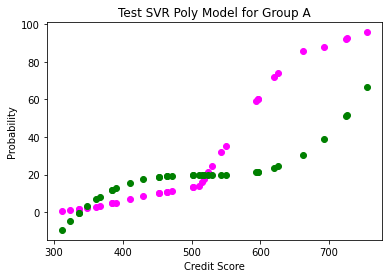

Run SVR with Poly Kernel for Group B:
-403.01304631557355
Note: magenta is true, green is predicted


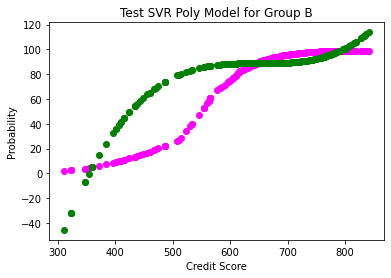

In [13]:
print("Run SVR with Poly Kernel for Group A:")
svr_poly_A = run_svr(X_train_A, y_train_A, X_test_A, y_test_A, kernel='poly', C=1.0, epsilon=0.3)
visualize_svr(svr_poly_A, X_test_A, y_test_A, 'Test SVR Poly Model for Group A')

print("Run SVR with Poly Kernel for Group B:")
svr_poly_B = run_svr(X_train_B, y_train_B, X_test_B, y_test_B, kernel='poly', C=1.0, epsilon=0.3)
visualize_svr(svr_poly_B, X_test_B, y_test_B, 'Test SVR Poly Model for Group B')

In [14]:
# TODO: try other data
# TODO: try other epsilon and C values?
# try changing epsilon and C/the regularization parameter (how much you want to avoid misclassifying each training example)

In [15]:
# Poly results achieved before on first data

# Group B
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.2)) #-->coeff: -536.2309036564716
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.3)) #-->coeff: -559.4341930966343
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=0.5, epsilon=0.3))  #-->coeff: -474.5324357435279
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=0.1, epsilon=0.3))  #-->coeff: -467.13337490366484

# Group A
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.2)) #-->coeff: -156.2427009940815 
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1.0, epsilon=0.3)) #-->coeff: -155.97656188927664
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=0.5, epsilon=0.3))  #-->coeff: -226.4586785310316
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(kernel='poly', C=0.1, epsilon=0.3))  #-->coeff: -128.6310324010967

### 5.1.3 SVR Sigmoid Kernel

Run SVR with Sigmoid Kernel for Group A:
-1.5226086119613211
Note: magenta is true, green is predicted


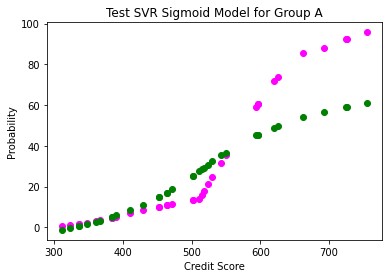

Run SVR with Sigmoid Kernel for Group B:
-2.085622576775305
Note: magenta is true, green is predicted


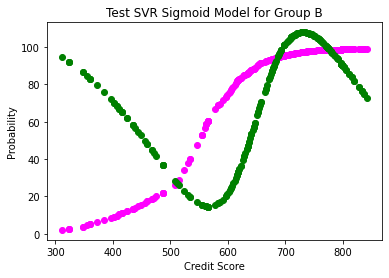

In [16]:
print("Run SVR with Sigmoid Kernel for Group A:")
svr_sig_A = run_svr(X_train_A, y_train_A, X_test_A, y_test_A, kernel='sigmoid', C=1.0, epsilon=0.3)
visualize_svr(svr_sig_A, X_test_A, y_test_A, 'Test SVR Sigmoid Model for Group A')

print("Run SVR with Sigmoid Kernel for Group B:")
svr_sig_B = run_svr(X_train_B, y_train_B, X_test_B, y_test_B, kernel='sigmoid', C=1.0, epsilon=0.3)
visualize_svr(svr_sig_B, X_test_B, y_test_B, 'Test SVR Sigmoid Model for Group B')

In [ ]:
# Sigmoid SVR results achieved below on first data

# below are for Group B
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=1.0, epsilon=0.2)) #-->coeff: -0.41868297133015675
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=1.0, epsilon=0.3)) #-->coeff: -0.41868297133015675
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=0.1, epsilon=0.3)) #-->coeff: -0.41868297133015675
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=0.5, epsilon=0.3))  #-->coeff: -0.41868297133015675

# below are for Group A
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=1.0, epsilon=0.2)) #-->coeff: -1.6361109468366029
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=1.0, epsilon=0.3)) #-->coeff: -1.6434446411199568
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=0.5, epsilon=0.3))  #-->coeff: -1.2341282202386221
# BEST COEFF OF DETER BELOW
#regr = make_pipeline(StandardScaler(), SVR(kernel='sigmoid', C=0.1, epsilon=0.3))  #-->coeff: -0.5210342120547167

## 5.2 KNeighbors Regressor from Scikit-Learn

In [ ]:
# TODO: adapt below code with new configs above

In [ ]:
#! pip3 install mglearn

In [ ]:
# Try KNeighbors Regressor
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
# Reference for algorithms param: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms
# Reference for metric param: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

# CHANGE GROUPS BELOW
x = samples_B.reshape(-1,1)
y = samples_B_probs
#print(x)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test).reshape(-1,1)
print('The coefficient of determination: ', neigh.score(y_pred, y_test))

In [ ]:
# Reference: https://medium.com/analytics-vidhya/k-neighbors-regression-analysis-in-python-61532d56d8e4
# ^ Made some changes to above

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
#line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test).reshape(-1,1)
    print('The coefficient of determination: ', reg.score(y_pred, y_test))
    #ax.plot(line, reg.predict(line))
    ax.plot(X_test, reg.predict(X_test), color = 'green')
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0),   
             markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title('{} neighbors\n test score: {:.2f}'.format(n_neighbors,    
              reg.score(y_pred, y_test)))
    ax.set_xlabel("Credit Score")
    ax.set_ylabel("Repay Probability")
axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")

# 6. Linear Regression

In [ ]:
# TODO: take the below and try with new data??

# NOTE: below might not work because data isn't exactly linear...

# Note: much of the linear regression code is adapted from the below link
# Reference: https://realpython.com/linear-regression-in-python/

'''
def run_linear_regression(x_arr, y_arr):
    # data prep
    x = x_arr.reshape(-1,1)
    y = y_arr
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    
    # train model
    model = LinearRegression().fit(x_train, y_train)

    # analyze regression model on training set
    # NOTE: the intercept, b0 value or coefficient, tells us what the regression predicts if the x is zero
    #       the slope, b1 value, tells us how the predicted response rises/increases when x is increased by 1
    # QUESTION: not sure if the input for score here should be our train and test x and y values? or our test values?
    r_sq = model.score(x_train, y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    print('slope/coef:', model.coef_)
    
    # get predictions
    y_pred = model.predict(x_test)
    print('predicted response:', y_pred, sep='\n')
    
    return model, y_test, y_pred

# NOTE: this function came from the Naomi Fridman's answer here 
# Reference: https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-python-scikit-like-r-does
from sklearn import metrics

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

# Run linear regression on Group A -- Black

model_A, y_test_A, y_pred_A = run_linear_regression(samples_A, samples_A_probs)

# Analysis on Group A linear regression predictions
# NOTE: can't get regression results because some predicted values are negative...
regression_results(y_test_A, y_pred_A)

# Run linear regression on Group B -- White

model_B, y_test_B, y_pred_B = run_linear_regression(samples_B, samples_B_probs)

# Analysis on Group B linear regression predictions
# NOTE: can't get regression results because some predicted values are negative...
regression_results(y_test_B, y_pred_B)
'''